# MNIST 분류

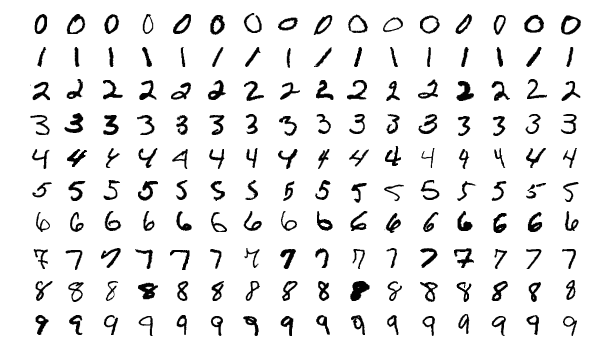

우선 MNIST 문제는 분류 문제입니다. 

분류 문제에서 각 범주(Category) 를 클래스(class) 라고 부르고, 데이터 포인트는 샘플(sample) 이라고 불리며, 샘플의 클래스를 레이블(label) 이라고 합니다.

In [212]:
from keras.datasets import mnist

In [213]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [214]:
print(train_images.ndim)

3


In [215]:
print(train_images.shape)

(60000, 28, 28)


In [216]:
print(train_images.dtype)

uint8


각 데이터는 numpy 배열 형태로 데이터를 지니고 있습니다. 

In [217]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

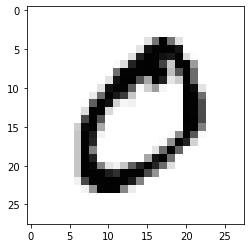

In [227]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap='Greys')
plt.show()

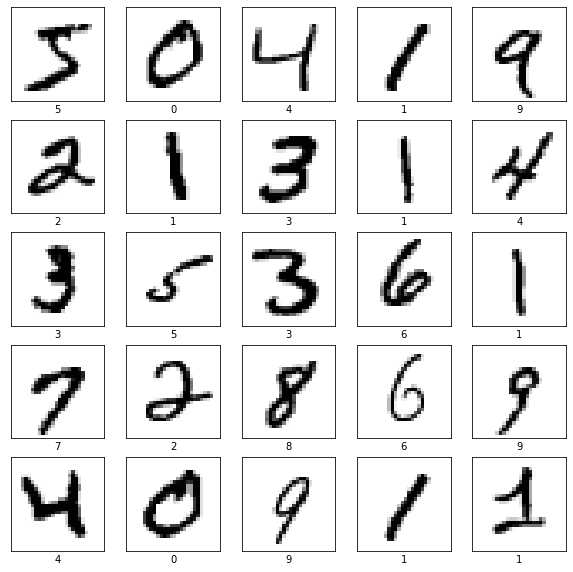

In [230]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## 모델 만들기

각 층은. relu 층과 softmax 층입니다. 

이렇게 신경망에 층을 추가하여, 의미있는 표현을 점진적으로 추출하는 것입니다. 

마지막의 소프트맥스 층의 경우는 10개의 확률 점수가 들어 있는 배열을 반환합니다.

In [234]:
from keras import models
from keras import layers
from keras.utils.vis_utils import plot_model

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)#model.png 저장

#model.summary()

## 모델 그리기

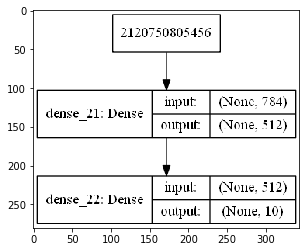

In [233]:
import matplotlib.image as img
 
fileName = "model_plot.png"
ndarray = img.imread(fileName)
plt.imshow(ndarray)
plt.show()

## 모델 컴파일

-손실함수

-옵티마이저

-훈련과 테스트 과정을 모니터링할 지표

In [204]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

[0,255] 사이의 값인 uint8타입으로 데이터들이 있으므로 변환해줍니다.

In [205]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

labels을 one-hot_encoding해줍니다.

In [208]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [209]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [210]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2529 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.1030 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0676 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0490 - acc: 0.9853
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step
test_acc: 0.982


## 스칼라(0D텐서)

In [17]:
import numpy as np

a = np.array(12)

In [18]:
a

array(12)

ndim속성으로 축 개수를 확인할 수 있고 텐서의 축 개수를 rank라고 부릅니다.

In [19]:
a.ndim

0

## 벡터(1D텐서)

In [20]:
b = np.array([12,3,6,14,7])

In [21]:
b

array([12,  3,  6, 14,  7])

In [22]:
b.ndim

1

## 행렬(2D텐서)

In [23]:
c = np.array([[5,78,2,34,0],[6,79,3,35,1],[7,80,4,36,2]])

In [24]:
c

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [25]:
c.ndim

2

## 3D텐서와 고차원 텐서

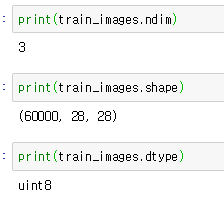

행렬의 배열을 3D 텐서라고 부릅니다. 이렇게 계속 배열을 만들어가며 텐서를 만듭니다. 

보통은 0D에서 4D를 다루며, 동영상의 경우에는 5D 텐서까지 가기도 합니다.

축의 개수, 크기, 타입 확인할 수 있습니다.

## numpy로 텐서 조작

In [41]:
my_slice = train_images[10000:20000, 7:-7, 7:-7]

print(my_slice.shape)

(10000, 14, 14)


In [42]:
my_slice

array([[[249, 253, 187, ..., 233,   0,   0],
        [253, 230,  48, ..., 156,   0,   0],
        [ 20,  15,   0, ...,  74,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 253,  36],
        [  0,   0,   0, ..., 253, 173,  11],
        [  0,   0,   0, ..., 226,   9,   0]],

       [[  0,   0,   0, ..., 197,  24,  72],
        [  0,   0,   0, ...,  24,  44, 235],
        [  0,   0,   0, ...,  72, 207, 252],
        ...,
        [  0, 135, 252, ...,   0,   0,   0],
        [ 28, 233, 252, ...,   0,   0,   0],
        [134, 252, 252, ...,   0,   0,   0]],

       [[254, 252, 252, ..., 252, 255, 252],
        [252, 250, 250, ..., 250, 252, 250],
        [252, 189, 190, ..., 250, 252, 189],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

## 배치 데이터

모든 데이터 텐서의 첫번째 축(인덱스 0)은 샘플 축(sample axis) 입니다. 

딥러닝 모델은 한 번에 전체 데이터 셋을 처리하는 것이 아닌 단위로 나누어 순차적으로 처리합니다. 이때 나누는 단위를 배치(batch) 라고 합니다.

In [40]:
batch = train_images[:128]

print(batch.shape)

(128, 28, 28)


In [39]:
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## 시계열 데이터

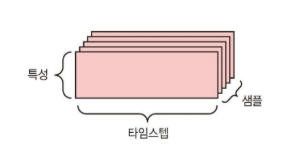

## 원소별 연산

원소별 연산이라 함은 연산의 결과가 텐서에 있는 원소를 독립적으로 연산함을 의미합니다.

In [56]:
x = np.array([[1,2,3],[3,4,5],[5,6,7]])

y = np.array([[0,1,2],[3,4,5],[6,7,8]])

print(x)
print(y)

[[1 2 3]
 [3 4 5]
 [5 6 7]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [53]:
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape == y.shape
    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x

In [54]:
naive_add(x,y)

array([[ 1,  3,  5],
       [ 6,  8, 10],
       [11, 13, 15]])

In [57]:
z=x+y
z

array([[ 1,  3,  5],
       [ 6,  8, 10],
       [11, 13, 15]])

## 브로드캐스팅

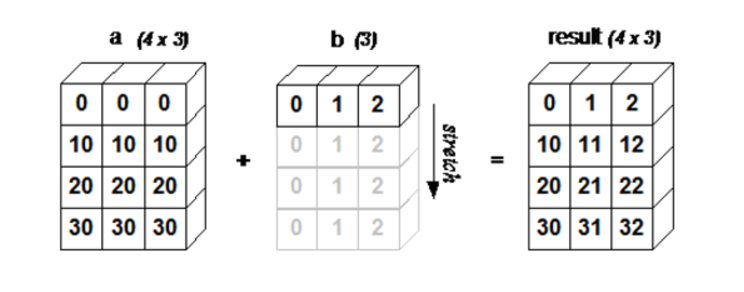

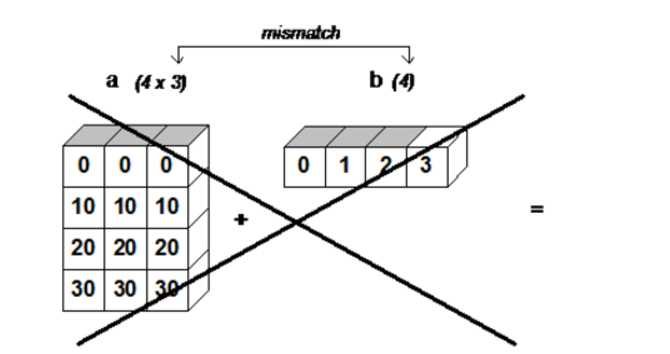

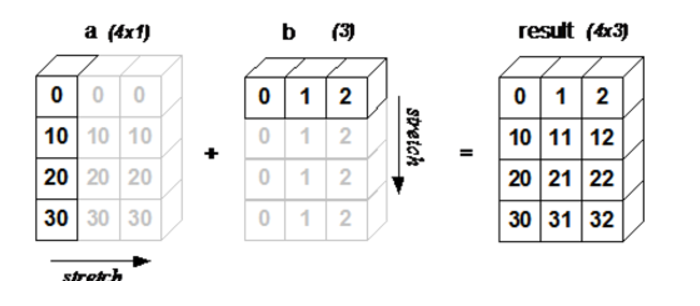

## 텐서 크기 변환

In [60]:
t = np.array([[0.,1.],[2.,3.],[4.,5.]])

print(t.shape)

(3, 2)


In [61]:
t=t.reshape((6,1))

In [63]:
t

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [64]:
t=t.reshape((2,3))

t

array([[0., 1., 2.],
       [3., 4., 5.]])

In [65]:
ze=np.zeros((300,20))

ze=np.transpose(ze)

print(ze.shape)

(20, 300)


## 변화율

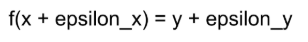

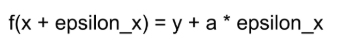

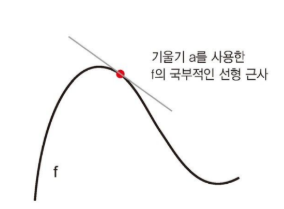

## 확률적 경사 하강법

1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출합니다.

2. x로 네트워크를 실행하고 예측 y_pred를 구합니다.

3. 이 배치에서 y_pred와 y사이의 오차를 측정하여 네트워크의 손실을 계산합니다.

4. 네트워크의 파라미터에 대한 loss_function의 gradient를 계산합니다.

5. gradient의 반대 방향으로 파라미터를 조금 이동시킵니다.

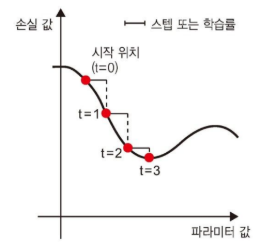

## 역전파 알고리즘

3개의 텐서연산a,b,c와 가중치 행렬W1,W2,W3로 구성된 네트워크 f를 예로 들어 보겠습니다.

f(W1,W2,W3) = a(W1,b(w2,c(W3)))



연쇄 법칙을 사용하여 유도될 수 있습니다.

역전파는 최종 손실 값에서부터 시작합니다.

손실 값에 각 파라미터가 기여한 정도를 계산하기 위해 령쇄 법칙을 적용하여 최상위 층에서 하위 층까지 거꾸로 진행됩니다.